In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
data = pd.read_csv('GOOG.csv',date_parser=True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2512,2020-08-25,1582.069946,1611.619995,1582.069946,1608.219971,1608.219971,2247100
2513,2020-08-26,1608.000000,1659.219971,1603.599976,1652.380005,1652.380005,3993400
2514,2020-08-27,1653.680054,1655.000000,1625.750000,1634.329956,1634.329956,1861600
2515,2020-08-28,1633.489990,1647.170044,1630.750000,1644.410034,1644.410034,1499800
2516,2020-08-31,1647.890015,1647.964966,1630.310059,1634.180054,1634.180054,1820600


###  we are going to take data before 2020 as training data

In [19]:
data_training = data[data['Date']< '2020-01-01'].copy()
data_test= data[data['Date']>= '2020-01-01'].copy()


In [10]:
# we are dropping the date and adjclose column
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1) 

In [11]:
# WE ARE  using min max scaler
scaler = MinMaxScaler()

data_training = scaler.fit_transform(data_training)
data_training

array([[0.00000000e+00, 2.24092550e-04, 0.00000000e+00, 0.00000000e+00,
        2.17553365e-01],
       [3.44442806e-03, 0.00000000e+00, 3.45120825e-03, 1.25428261e-03,
        1.13367862e-01],
       [6.80999163e-03, 3.27357031e-03, 6.60191571e-03, 4.38779099e-03,
        1.71137409e-01],
       ...,
       [9.99683309e-01, 9.99585436e-01, 9.97019348e-01, 9.91801113e-01,
        3.46355121e-02],
       [9.88255595e-01, 9.89414742e-01, 9.83455509e-01, 9.77886021e-01,
        3.50556420e-02],
       [9.70757707e-01, 9.76183170e-01, 9.79077604e-01, 9.78663503e-01,
        3.20609558e-02]])

In [12]:
X_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
X_train.shape

(2289, 60, 5)

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


In [15]:
regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [16]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            15840     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [17]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
72/72 [==============================] - 10s 136ms/step - loss: 0.0302
Epoch 2/50
72/72 [==============================] - 11s 148ms/step - loss: 0.0040
Epoch 3/50
72/72 [==============================] - 9s 130ms/step - loss: 0.0035
Epoch 4/50
72/72 [==============================] - 10s 137ms/step - loss: 0.0031
Epoch 5/50
72/72 [==============================] - 9s 124ms/step - loss: 0.0036
Epoch 6/50
72/72 [==============================] - 9s 126ms/step - loss: 0.0031
Epoch 7/50
72/72 [==============================] - 9s 126ms/step - loss: 0.0026
Epoch 8/50
72/72 [==============================] - 9s 128ms/step - loss: 0.0025
Epoch 9/50
72/72 [==============================] - 9s 123ms/step - loss: 0.0028
Epoch 10/50
72/72 [==============================] - 9s 127ms/step - loss: 0.0026
Epoch 11/50
72/72 [==============================] - 9s 123ms/step - loss: 0.0023
Epoch 12/50
72/72 [==============================] - 9s 124ms/step - loss: 0.0024
Epoch 13/50
72/72 [===

In [20]:
data_test.head()


,Date,Open,High,Low,Close,Adj Close,Volume
2349,2020-01-02,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600
2350,2020-01-03,1347.859985,1372.500000,1345.543945,1360.660034,1360.660034,1186400
2351,2020-01-06,1350.000000,1396.500000,1350.000000,1394.209961,1394.209961,1732300
2352,2020-01-07,1397.939941,1402.989990,1390.380005,1393.339966,1393.339966,1502700
2353,2020-01-08,1392.079956,1411.579956,1390.839966,1404.319946,1404.319946,1528000


In [21]:
past_60_days = data_training.tail(60)

In [22]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1204.400024,1218.203979,1203.750000,1207.680054,842900
1,1197.589966,1206.079956,1189.010010,1189.130005,1039300
2,1199.349976,1208.349976,1197.630005,1202.310059,867700
3,1198.579956,1215.000000,1197.339966,1208.670044,846600
4,1222.209961,1228.390015,1213.739990,1215.449951,1272700


In [23]:
inputs = scaler.transform(df)
inputs

array([[0.8601666 , 0.87051053, 0.86789259, 0.86439191, 0.02806468],
       [0.85417557, 0.85981587, 0.85481671, 0.84800298, 0.03466576],
       [0.85572391, 0.86181826, 0.86246353, 0.85964753, 0.02889822],
       ...,
       [1.25541274, 1.25581039, 1.24225003, 1.24133622, 0.06230359],
       [1.23765089, 1.24890355, 1.24668554, 1.25024195, 0.05014335],
       [1.25031905, 1.24960476, 1.24629527, 1.24120379, 0.06092556]])

In [24]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((168, 60, 5), (168,))

In [25]:
y_pred = regressor.predict(X_test)

In [26]:
scaler.scale_

array([8.79732266e-04, 8.82104801e-04, 8.87102916e-04, 8.83497955e-04,
       3.36103950e-08])

In [27]:
scale = 1/8.18605127e-04
scale

1221.5901990069017

In [28]:
y_pred = y_pred*scale
y_test = y_test*scale

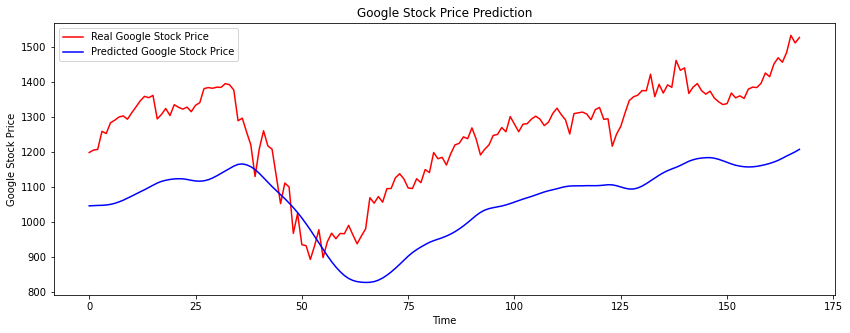

In [29]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()